## 학습 목표
- 데이터의 편향성에 대한 문제의식을 갖는다.
- 임베딩 모델의 편향성을 체크하는 방법 중 하나인 Word Embedding Association Test (WEAT)를 알아본다.
- WEAT 수식의 의미를 이해하고 이를 구현해본다.
- pre-train된 모델을 불러와서 WEAT score를 구해본다.


# 6-2. 워드 임베딩의 편향성

## 워드 임베딩 속의 편향성
프로그래머와 가정주부는 중립적인 단어임에도 불구하고 프로그래머라는 단어에서 남자가, 가정주부에서 여자가 떠오름. 우리의 무의식 속에서 그렇게 느끼는 것.  

word embedding 속에서도 우리가 가지고 있을지도 모를 편견을 고스란히 반영시켜놓음

## WEAT(Word Embedding Association Test)

WEAT는 임베딩 모델의 편향을 측정하는 방식 중 하나. male, female, science, art의 거리도를 계산하여 science와 male, science와 female의 거리를 비교하는 것. 중립이라면 가운데일꺼고 편향성이 있다면 거리가 다를 것

WEAT는 male과 female, science와 art라는 개념을 가장 잘 대표하는 단어들을 여러개 골라 단어 셋을 만듦. 그리고 단어 셋에 속한 모든 단어들끼리의 편향성을 전부 계산해서 평균수치화 해보면 보다 명확하게 개념적인 편향성이 존재함임을 밝힐 수 있지 않을까?

이러한 단어 셋을 WEAT에서는 각각 target, attribute라고 함.
science를 대표하는 target단어 셋 x와 art를 대표하는 target 단어 셋 y가 있다고 하면 x-y셋을 통한 개념축 하나가 얻어짐.  
그리고 male을 대표하는 attribute 단어 셋 a와 female을 대표하는 attribute 딴어셋 b가 있다면 a-b셋을 통한 개념축 하나가 또 얻어짐.  
편향성이 없다면 x에속한 단어들은 a에 속한 단어들과의 거리나 b에 속한 단어들과의 거리가 별 차이가 없어야하지만, 반대의 경우라면 뚜렷하게 차이가 남. y도 마찬가지.

WEAT score는 바로 위와 같은 방식으로 계산된 수치. 절대값이 클수록 두 개념축 사이의 편향성이 크게 나타나는 것으로 해석 됨.

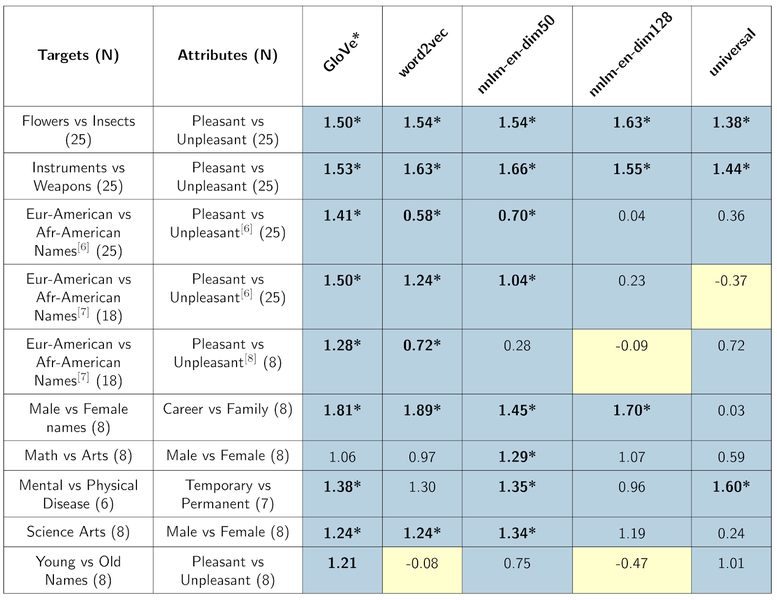

표에서 파란색은 사람의 편향과 같은 경우이고, 노란색은 사람의 편향과 반대인 경우를 의미합니다. (사람이 가진 편향은 Implicit Association Tests로 측정했습니다.)
대부분의 색이 파란색인 것을 볼 수 있습니다. 이 표가 또한 말해주는 것은, 사람이 가진 편향이 자연어 코퍼스 데이터에 반영되어있고, 이 데이터로 만든 워드 임베딩 모델은 그 편향을 내재할 수밖에 없다는 점입니다.

꽃과 벌레, 유쾌함과 불쾌함 등 누구나 동의할만한 편향성이 존재하는 경우엔 대부분의 경우 WEAT score의 절댓값이 1.5 이상으로 뚜렷한 편향성 수치가 나오는 것을 볼 수 있습니다. 그 외 다양한 개념축간 편향성이 존재하는 것도 흥미롭게 살펴볼 수 있습니다.

그리고 Glove, Word2Vec 등 다양한 워드 임베딩 모델에 대해 동일한 실험을 하여 WEAT score를 측정해 본 결과도 흥미롭습니다. 모델마다 WEAT score가 동일하게 나오는 것이 아닙니다. 이런 차이점의 원인을 분석해 보는 것도 흥미로울 것 같습니다.

## 6-3. WEAT를 통한 편향성 측정

### WEAT score는 다음과 같이 정의
$\frac{\rm{mean}_{\it x \in X}s(x,A, B) - \rm{mean}_{\it y \in Y}s(y,A, B)}{\rm{std}_{\it w \in X \cup Y}s(w, A, B)}$

이 테스트는 두 벡터의 유사도를 측정하기 위해 cosine similarity를 이용합니다.
cosine similarity는 두 벡터 사이의 cosine 값을 이용하여 두 벡터의 유사도를 측정합니다.
다시 말해, 두 벡터$i,j$ 가 주어졌을 때, cosine similarity $cos(\theta)$는 dot product와 magnitude를 사용하여 구할 수 있습니다.

$
cos(\theta) = \frac{i\cdot j}{||i||||j||}
$

- $cos(\theta)=1$ 두 벡터의 방향이 똑같을 때
- $cos(\theta)=0$ 두 벡터가 직교할 때
- $cos(\theta)=-1$ 두 벡터의 방향이 반대일 때
cosine similarity는 -1에서 1을 가질 수 있으며 두 벡터의 방향이 얼마나 유사한지를 나타내게 됩니다.

벡터 $\overrightarrow{i}$와 $\overrightarrow{j}$가 있을 때, $cos(\overrightarrow{i}, \overrightarrow{j})$는 벡터 $\overrightarrow{i}$와 $\overrightarrow{j}$의 Cosine simliarity를 의미하므로,

아래 식의 $s(w, A, B)$ 가 의미하는 것은 target에 있는 단어 $w$가 두 attribute 셋 A, B에 속한 단어들과의 유사도의 평균(mean)값이 얼마나 차이 나는지를 측정합니다. 즉, $s(w, A, B)$ 는 개별 단어 $w$가 개념축 A-B에 대해 가지는 편향성을 계산한 값이 됩니다. 이 편향성 값은 -2에서 2사이의 값을 가지게 되며, 그 절댓값이 클수록 는 A-B 개념축에 대해 편향성을 가진다는 뜻이 됩니다.


$s(w, A, B) = {\rm{mean}_{\it a \in A}cos(\it\overrightarrow{w}, \overrightarrow{a}) - \rm{mean}_{\it b \in B}{cos(\it\overrightarrow{w}, \overrightarrow{b})}}$


이제 맨 위에 소개했던 WEAT score의 정의로 되돌아가 봅시다.

$\frac{\rm{mean}_{\it x \in X}s(x,A, B) - \rm{mean}_{\it y \in Y}s(y,A, B)}{\rm{std}_{\it w \in X \cup Y}s(w, A, B)}$

위 식의 분자 부분은 target X, Y에 속하는 각 단어 x,u 들이 개념축 A-B에 대해 가지는 편향성을 다시 평균 내서 뺀 차이에 해당합니다. 즉, X에 속하는 단어들과 Y에 속하는 단어들이 A-B 개념축에 대해 가지는 편향성의 정도가 뚜렷이 차이 날수록 이 WEAT score 식의 분자값의 절댓값은 커지게 됩니다. 이 값을 X, Y에 속하는 모든 단어들이 가지는 편향성 값의 표준편차(std)로 normalize한 값이 최종 WEAT score가 됩니다.





# 6-4. WEAT 구현하기


In [1]:
# 모듈 import

import numpy as np
from numpy import dot
from numpy.linalg import norm

#### 우선 두개의 target 단어 셋 x, y와 두개의 attribute단어 셋 a,b를 정의.  
#### 단어 셋을 정할 때는 두개의 Traget 셋의 크긱 ㅏ가탕야하고, 두개의 attribute셋의 크기가 같아야 함.

- targets
        - A set(꽃) : 장미, 튤립, 백합, 데이지
        - B set(곤충) : 거미, 모기, 파리, 메뚜기

- attributes
        - X set(유쾌) : 사랑, 행복, 웃음
        - Y set(불쾌) : 재난, 고통, 증오


### 위 단어들의 임베딩 결과가 다음과 같다고 가정

In [2]:
target_A = {
    '장미': [4.1, 1.2, -2.4, 0.5, 4.1],
    '튤립': [3.1, 0.5, 3.6, 1.7, 5.8],
    '백합': [2.9, -1.3, 0.4, 1.1, 3.7],
    '데이지': [5.4, 2.5, 4.6, -1.0, 3.6]
}
target_B = {
    '거미': [-1.5, 0.2, -0.6, -4.6, -5.3],
    '모기': [0.4, 0.7, -1.9, -4.5, -2.9],
    '파리': [0.9, 1.4, -2.3, -3.9, -4.7],
    '메뚜기': [0.7, 0.9, -0.4, -4.1, -3.9]
}
attribute_X = {
    '사랑':[2.8,  4.2, 4.3,  0.3, 5.0],
    '행복':[3.8,  3. , -1.2,  4.4, 4.9],
    '웃음':[3.7, -0.3,  1.2, -2.5, 3.9]
}
attribute_Y = {
    '재난': [-0.2, -2.8, -4.7, -4.3, -4.7],
    '고통': [-4.5, -2.1,  -3.8, -3.6, -3.1],
    '증오': [-3.6, -3.3, -3.5,  -3.7, -4.4]
}

In [3]:
A = np.array([v for v in target_A.values()])
B = np.array([v for v in target_B.values()])

print(A)
print(B)

[[ 4.1  1.2 -2.4  0.5  4.1]
 [ 3.1  0.5  3.6  1.7  5.8]
 [ 2.9 -1.3  0.4  1.1  3.7]
 [ 5.4  2.5  4.6 -1.   3.6]]
[[-1.5  0.2 -0.6 -4.6 -5.3]
 [ 0.4  0.7 -1.9 -4.5 -2.9]
 [ 0.9  1.4 -2.3 -3.9 -4.7]
 [ 0.7  0.9 -0.4 -4.1 -3.9]]


In [4]:
X = np.array([v for v in attribute_X.values()])
Y = np.array([v for v in attribute_Y.values()])

print(X)
print(Y)

[[ 2.8  4.2  4.3  0.3  5. ]
 [ 3.8  3.  -1.2  4.4  4.9]
 [ 3.7 -0.3  1.2 -2.5  3.9]]
[[-0.2 -2.8 -4.7 -4.3 -4.7]
 [-4.5 -2.1 -3.8 -3.6 -3.1]
 [-3.6 -3.3 -3.5 -3.7 -4.4]]


### s('사랑', A, B) 계산

In [5]:
def cos_sim(i,j):
    return dot(i, j.T)/(norm(i)*norm(j))

def s(w, A, B):
    c_a = cos_sim(w, A)
    c_b = cos_sim(w, B)
    mean_A = np.mean(c_a, axis=-1)
    mean_B = np.mean(c_b, axis=-1)
    return mean_A - mean_B # , c_a, c_b

print(s(attribute_X['사랑'], A, B))

0.5901751654626237


### WEAT score값이 양수이므로, attribute_X에 있는 '사랑'이라는 단어는 target_B(곤충)보다 target_A(꽃)와 더 가깝다는 것을 알 수 있습니다.

### attribute_Y에 있는 '재난'과의 관계도 계산해봅시다.



In [6]:
print(s(attribute_Y['재난'], A, B))

-0.6691842929755343


### 위와 반대로 WEAT score가 음수가 나왔으므로, '재난'은 target_B와 더 가깝다는 것을 알 수 있습니다.

### 그럼 attribute_X와 target_A, target_B 사의의 평균값, 그리고 attribute_Y와 target_A, target_B 사의의 평균값은 어떻게 될까요?



In [7]:
print(s(X, A, B))
print(round(np.mean(s(X, A, B)), 3))

[0.37181942 0.41632807 0.21117431]
0.333


### attribute_X와 target_A, target_B 사이의 평균값은 0.333입니다.

In [8]:
print(s(Y, A, B))
print(round(np.mean(s(Y, A, B)), 3))

[-0.39609272 -0.37389852 -0.41242037]
-0.394


### attribute_Y와 target_A, target_B 사이의 평균값은 -0.394입니다.

### 그럼 이번에는 WEAT score의 수식 전체를 코드로 나타내 봅시다.
$\frac{\rm{mean}_{\it x \in X}s(x,A, B) - \rm{mean}_{\it y \in Y}s(y,A, B)}{\rm{std}_{\it w \in X \cup Y}s(w, A, B)}$

In [9]:
def weat_score(X, Y, A, B):
    s_X = s(X, A, B)
    s_Y = s(Y, A, B)
    
    mean_X = np.mean(s_X)
    mean_Y = np.mean(s_Y)
    
    std_dev = np.std(np.concatenate([s_X, s_Y], axis=0))
    
    return (mean_X-mean_Y)/std_dev

print(round(weat_score(X, Y, A, B), 3))

1.97


### WEAT score가 매우 높게 나온 것을 알 수 있습니다. 즉, 꽃은 유쾌한 단어와 상대적으로 가깝고, 곤충은 불쾌한 단어와 가깝다는 것을 수치적으로 확인할 수 있었습니다.

### 이제 이를 시각적으로 확인해볼까요?
### PCA를 통해 5차원이었던 벡터를 2차원으로 줄여 그림을 그려보겠습니다.



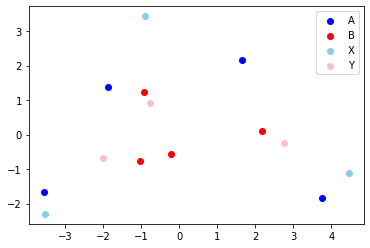

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pc_A = pca.fit_transform(A)
pc_B = pca.fit_transform(B)
pc_X = pca.fit_transform(X)
pc_Y = pca.fit_transform(Y)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(pc_A[:,0],pc_A[:,1], c='blue', label='A')
ax.scatter(pc_B[:,0],pc_B[:,1], c='red', label='B')
ax.scatter(pc_X[:,0],pc_X[:,1], c='skyblue', label='X')
ax.scatter(pc_Y[:,0],pc_Y[:,1], c='pink', label='Y')
plt.legend()

## 파란색 점(A)과 하늘색 점(X)이 가깝고, 빨간색 점(B)과 분홍색 점(Y)이 가깝게 표현된 것을 확인할 수 있습니다.

# 6-5. 사전학습된 Word Embedding에 WEAT 적용

워드임베딩 내 300만개 단어 중 자주 쓰는 50만개만 사용

```
w2v = KeyedVectors.load_word2vec_format(model_dir, binary=True, limit=500000)
```


In [11]:
import os

data_dir = '~/aiffel/weat' 
model_dir = os.path.join(data_dir, 'GoogleNews-vectors-negative300.bin')

from gensim.models import KeyedVectors

# 50만개의 단어만 활용합니다. 메모리가 충분하다면 limit 파라미터값을 생략하여 300만개를 모두 활용할 수 있습니다. 
w2v = KeyedVectors.load_word2vec_format(model_dir, binary=True, limit=500000)

In [12]:
w2v

In [13]:
# print(len(w2v.vocab))   # Gensim 3.X 버전까지는 w2v.vocab을 직접 접근할 수 있습니다. 
# print(len(w2v.index_to_key))   # Gensim 4.0부터는 index_to_key를 활용해 vocab size를 알 수 있습니다. 
# print(len(w2v['I']))                    # 혹은 단어를 key로 직접 vector를 얻을 수 있습니다. 
# print(w2v.vectors.shape)

print(len(w2v.index2word))
print(len(w2v['I']))
print(w2v.vectors.shape)

500000
300
(500000, 300)


### w2v에는 limit으로 지정한 갯수(디폴트는 3,000,000개)의 단어가 있고, 각 단어는 300차원을 갖는다는 것을 알 수 있습니다.

In [14]:
# happy 단어의 벡터 확인 

w2v['happy']

array([-5.18798828e-04,  1.60156250e-01,  1.60980225e-03,  2.53906250e-02,
        9.91210938e-02, -8.59375000e-02,  3.24218750e-01, -2.17285156e-02,
        1.34765625e-01,  1.10351562e-01, -1.04980469e-01, -2.90527344e-02,
       -2.38037109e-02, -4.02832031e-02, -3.68652344e-02,  2.32421875e-01,
        3.20312500e-01,  1.01074219e-01,  5.83496094e-02, -2.91824341e-04,
       -3.29589844e-02,  2.11914062e-01,  4.32128906e-02, -8.59375000e-02,
        2.81250000e-01, -1.78222656e-02,  3.79943848e-03, -1.71875000e-01,
        2.06054688e-01, -1.85546875e-01,  3.73535156e-02, -1.21459961e-02,
        2.04101562e-01, -3.80859375e-02,  3.61328125e-02, -8.15429688e-02,
        8.44726562e-02,  9.37500000e-02,  1.44531250e-01,  7.42187500e-02,
        2.51953125e-01, -7.91015625e-02,  8.69140625e-02,  1.58691406e-02,
        1.09375000e-01, -2.23632812e-01, -5.15747070e-03,  1.68945312e-01,
       -1.36718750e-01, -2.51464844e-02, -3.85742188e-02, -1.33056641e-02,
        1.38671875e-01,  

In [15]:
# happy와 유사한 단어 찾기
w2v.most_similar(positive=['happy'])

[('glad', 0.7408890724182129),
 ('pleased', 0.6632170677185059),
 ('ecstatic', 0.6626912355422974),
 ('overjoyed', 0.6599286794662476),
 ('thrilled', 0.6514049768447876),
 ('satisfied', 0.6437948942184448),
 ('proud', 0.636042058467865),
 ('delighted', 0.6272379159927368),
 ('disappointed', 0.6269949674606323),
 ('excited', 0.6247665882110596)]

In [16]:
w2v.most_similar(positive=['family'])

[('relatives', 0.6662652492523193),
 ('familiy', 0.6517066955566406),
 ('families', 0.6252894401550293),
 ('siblings', 0.6140849590301514),
 ('friends', 0.6128394603729248),
 ('mother', 0.6065611839294434),
 ('aunt', 0.5811319947242737),
 ('grandparents', 0.576207160949707),
 ('father', 0.5717043876647949),
 ('Family', 0.5672314763069153)]

In [17]:
w2v.most_similar(positive=['school'])

[('elementary', 0.7868632674217224),
 ('schools', 0.7411909103393555),
 ('elementary_schools', 0.6597153544425964),
 ('kindergarten', 0.6529810428619385),
 ('eighth_grade', 0.6488089561462402),
 ('School', 0.6477997303009033),
 ('teacher', 0.63824063539505),
 ('students', 0.6301523447036743),
 ('classroom', 0.6281620860099792),
 ('Schools', 0.6172096133232117)]

In [18]:
target_A = ['science', 'technology', 'physics', 'chemistry', 'Einstein', 'NASA', 'experiment', 'astronomy']
target_B = ['poetry', 'art', 'Shakespeare', 'dance', 'literature', 'novel', 'symphony', 'drama']
attribute_X = ['brother', 'father', 'uncle', 'grandfather', 'son', 'he', 'his', 'him']
attribute_Y = ['sister', 'mother', 'aunt', 'grandmother', 'daughter', 'she', 'hers', 'her']

A = np.array([w2v[word] for word in target_A])
B = np.array([w2v[word] for word in target_B])
X = np.array([w2v[word] for word in attribute_X])
Y = np.array([w2v[word] for word in attribute_Y])

weat_score(X, Y, A, B)

1.4821917

과학과 관련된 단어가 남성과 관련된 단어와 가깝고, 예술과 관련된 단어가 여성과 관련된 단어와 가깝게 나타났습니다.
사람의 편향성을 실험하는 IAT에서도 이와 같게 나타났었습니다.
많은 사람이 가진 편향이 임베딩 모델에 반영되었다고 볼 수 있습니다.

이제 다른 셋을 구성해볼까요?
두 개의 target 셋과 두 개의 attribute 셋을 다음과 같이 구성했습니다.
target_A는 인스턴트 식품들로 단어를 구성하였고 target_B는 그 반대로 구성했습니다.
attribute_X는 인스턴트를 의미하는 단어들로, attributes_Y는 그 반대로 구성했습니다.

이 단어 셋들을 보면 target_A는 attribute_X와 attribute_Y 중 어떤 것과 가깝다고 생각하시나요?
보통 target_A와 attribute_X가 가깝고, traget_B는 attribute_Y와 가깝다고 대답할 것입니다.
임베딩 모델도 그렇게 생각할까요?

In [19]:
target_A = ['pizza', 'coke', 'hamburger', 'ham', 'ramen', 'icecream', 'candy']
target_B = ['salad', 'fruit', 'vegetable', 'herb', 'root', 'greens', 'wholesome']
attribute_X = ['junk', 'canned', 'convenience', 'frozen', 'fast']
attribute_Y = ['health', 'beneficial', 'good', 'nourishing', 'nutritious']

A = np.array([w2v[word] for word in target_A])
B = np.array([w2v[word] for word in target_B])
X = np.array([w2v[word] for word in attribute_X])
Y = np.array([w2v[word] for word in attribute_Y])

weat_score(X, Y, A, B)

1.6929383

모델도 우리의 예상과 맞는 방향으로 상당히 높은 수치를 보이는 것을 확인했습니다.
인스턴트 식품의 예시와 인스턴트를 의미하는 단어가 가까운 것은 당연합니다. 이 경우 모델이 편향되어있다기보다 단어의 의미를 잘 파악했다고 볼 수 있습니다.



동일한 target 셋에 다른 attribute 셋을 만들볼까요?
attribute_X에는 책과 관련된 단어로 구성하고, attribute_Y는 뉴스와 관련된 단어로 구성했습니다.
이번에는 어떤 결과를 가져올까요?

In [20]:
target_A = ['pizza', 'coke', 'hamburger', 'ham', 'ramen', 'icecream', 'candy']
target_B = ['salad', 'fruit', 'vegetable', 'herb', 'root', 'greens', 'wholesome']
attribute_X = ['book', 'essay', 'dictionary', 'magazine', 'novel']
attribute_Y = ['news', 'report', 'statement', 'broadcast', 'word']

A = np.array([w2v[word] for word in target_A])
B = np.array([w2v[word] for word in target_B])
X = np.array([w2v[word] for word in attribute_X])
Y = np.array([w2v[word] for word in attribute_Y])

weat_score(X, Y, A, B)

-0.082050726

In [21]:
#메모리를 다시 비워줍시다.
del w2v
print("삭제 완료")

삭제 완료


# 6-6. 직접 만드는 Word Embedding에 WEAT 적용(1)

지금까지는 제시된 모델과 단어들로 WEAT score를 구해보았습니다.
이제 주어진 데이터로 다음과 같은 과정을 수행해보도록 하겠습니다.

1. 형태소 분석기를 이용하여 품사가 명사인 경우, 해당 단어를 추출하기
2. 추출된 결과로 embedding model 만들기
3. TF/IDF로 해당 데이터를 가장 잘 표현하는 단어 셋 만들기
4. embedding model과 단어 셋으로 WEAT score 구해보기


## 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기


In [22]:
import os
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end=' ')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
  젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
  어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
  자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
  자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
  너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
  그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
  이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
  "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
  영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
  은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
 유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
  민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해

In [23]:
# 약 15분정도 걸립니다.
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        # - norm은 normalize의 약자로 문장을 정규화하는 역할 - stem은 각 단어에서 어간을 추출하는 기능
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

In [24]:
print(len(tokenized))

71156


## 2. 추출된 결과로 embedding model 만들기



In [25]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
# model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
# model.wv.most_similar(positive=['영화'])

# Gensim 3.X 에서는 아래와 같이 생성합니다. 
model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)  
model.most_similar(positive=['영화'])

/home/aiffel-dj47/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('작품', 0.917068362236023),
 ('다큐멘터리', 0.8623884916305542),
 ('드라마', 0.8449099063873291),
 ('영화로', 0.8178189992904663),
 ('코미디', 0.8168832063674927),
 ('설정', 0.8048855066299438),
 ('스토리', 0.8042171001434326),
 ('형식', 0.80146324634552),
 ('전쟁영화', 0.8007985353469849),
 ('감동', 0.8000367879867554)]

In [26]:
model.wv.most_similar(positive=['사랑'])

[('첫사랑', 0.7149844169616699),
 ('진심', 0.7142016887664795),
 ('행복', 0.7121564149856567),
 ('연애', 0.7088674902915955),
 ('만남', 0.6959505081176758),
 ('감정', 0.6956105828285217),
 ('애정', 0.6944093704223633),
 ('이별', 0.6942036151885986),
 ('시빌라', 0.694015622138977),
 ('가슴', 0.6935081481933594)]

In [27]:
model.wv.most_similar(positive=['연극'])

[('영화감독', 0.8976817727088928),
 ('영감', 0.8916555047035217),
 ('예술가', 0.8855213522911072),
 ('뮤지션', 0.8841872215270996),
 ('시나리오', 0.8822871446609497),
 ('감성', 0.8807735443115234),
 ('연기자', 0.8803859949111938),
 ('무용', 0.8801887035369873),
 ('데뷔', 0.8795639872550964),
 ('팬', 0.8785635828971863)]

## 6-7. 직접 만드는 Word Embedding에 WEAT 적용(2)

### 3. TF-IDF로 해당 데이터를 가장 잘 표현하는 단어 셋 만들기
WEAT score를 구할 때 단어 셋을 만들어주어야 합니다.
targets_X, targets_Y, attribute_A, attribute_B를 만들어주었던 것이 기억나시죠?
그렇다면 우리는 두 축을 어떤 기준으로 잡고, 해당 축의 어떤 항목을 사용할지 정해야 합니다. 여기서는 두 축을 영화 장르, 영화 구분 정보를 이용하겠습니다. (영화 구분 정보란 일반영화, 예술영화, 독립영화로 구분된 정보입니다. KOBIS에서 제공한 정보를 기준으로 분류하였습니다. )


영화 구분  
synopsis_art.txt : 예술영화  
synopsis_gen.txt : 일반영화(상업영화)  
그 외 독립영화 등으로 분류됩니다.  


장르 구분  
synopsis_SF.txt: SF  
synopsis_가족.txt: 가족  
synopsis_공연.txt: 공연  
synopsis_공포(호러).txt: 공포(호러)  
synopsis_기타.txt: 기타  
synopsis_다큐멘터리.txt: 다큐멘터리  
synopsis_드라마.txt: 드라마  
synopsis_멜로로맨스.txt: 멜로로맨스  
synopsis_뮤지컬.txt: 뮤지컬  
synopsis_미스터리.txt: 미스터리  
synopsis_범죄.txt: 범죄  
synopsis_사극.txt: 사극  
synopsis_서부극(웨스턴).txt: 서부극(웨스턴)  
synopsis_성인물(에로).txt: 성인물(에로)  
synopsis_스릴러.txt: 스릴러  
synopsis_애니메이션.txt: 애니메이션  
synopsis_액션.txt: 액션  
synopsis_어드벤처.txt: 어드벤처  
synopsis_전쟁.txt: 전쟁  
synopsis_코미디.txt: 코미디  
synopsis_판타지.txt: 판타지  



이번에는 예술영화와 일반영화(상업영화)라는 영화구분을 target으로 삼고, 드라마 장르와 액션 장르라는 장르구분을 attribute로 삼아 WEAT score를 계산해 보겠습니다.
이것의 의미는, 드라마 장르에는 예술영화적 성격이 강하고, 액션 장르에는 일반(상업)영화적 성격이 강할 것이라는 편향성이 워드 임베딩 상에 얼마나 나타나고 있는지를 측정해 보겠다는 것입니다.

'synopsis_art.txt', 'synopsis_gen.txt' 두 파일을 읽고, 위에서 했던 것과 마찬가지로 명사에 대해서만 추출하여 art, gen 변수에 할당하시기 바랍니다.



In [28]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [29]:
# 2개의 파일을 처리하는데 10분 가량 걸립니다. 
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


WEAT 계산을 위해서는 총 4개의 단어 셋 X, Y, A, B가 필요합니다. 예를 들어, 예술영화라는 개념을 가장 잘 대표하는 단어들을 art_txt를 처리해서 만든 art라는 단어 리스트에서부터 골라내야 하는 것입니다. 이를 위해서 우리가 각자의 상식을 동원해서 적절한 단어를 골라낼 수도 있을 것입니다. 하지만 보다 납득할 수 있는 보편적인 방법을 사용하기를 바랍니다.

어떤 개념을 나타내는 단어를 선정하는 방법으로 어떤 것이 적당할까요? 꼭 정해진 방법이 있는 것은 아닙니다. 그러나 이번 경우에는 예술영화, 일반영화라는 영화구분별로 시놉시스를 모아 데이터를 구성했습니다. 그렇다면 예술영화를 잘 대표하는 단어란, 예술영화 시놉시스에는 자주 나타나지만 그 외 다른 구분의 영화(예를 들어 일반영화) 시놉시스에는 자주 나타나지 않는 것을 고르는 것이 적당할 것입니다.

이런 것과 비슷한 개념의 단어 분석 방식 중 TF-IDF라는 것을 이미 접해 보셨을 것입니다. 즉, 코퍼스에서 자주 나타나는(TF가 높은) 단어이지만, 다른 코퍼스에까지 두루 걸쳐 나오지는 않는(IDF가 높은) 단어를 선정하고 싶은 것입니다.
이번에는 단어 셋 구성을 위해 TF-IDF방식을 사용하겠습니다. (그러나 이 방식이 최선이라는 것은 아닙니다.)

In [30]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [31]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


In [32]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 spart matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 spart matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

어떤가요? 두 개념을 대표하는 단어를 TF-IDF가 높은 순으로 추출하고 싶었는데, 양쪽에 중복된 단어가 너무 많은 것을 볼 수 있습니다.
두 개념축이 대조되도록 대표하는 단어 셋을 만들고 싶기 때문에 중복되지 않게 추출하도록 합니다.
우선 상위 100개의 단어들 중 중복되는 단어를 제외하고 상위 n(=15)개의 단어를 추출합니다.

In [33]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [34]:
# 추출된 단어 살펴 보기 
print(target_art)
print(target_gen)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']
['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


이번에는 장르별 대표 단어를 추출해 봅시다. 이번에는 드라마 장르와 액션 장르를 다루어 보려고 합니다. 그러나 그렇다고 해서 드라마와 액션 단 2개의 장르만 고려하기보다는 여러 장르의 코퍼스를 두루 고려하는 것이 특정 장르를 대표하는 단어를 선택하는 데 더 유리할 것입니다. 이번에는 주요 장르 5개만 고려해 봅시다

In [35]:
genre_txt = ['synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_action.txt', 'synopsis_comedy.txt', 'synopsis_war.txt', 'synopsis_horror.txt']
genre_name = ['드라마', '멜로로맨스', '액션', '코미디', '전쟁', '공포(호러)']

In [36]:
# 약 10분정도 걸립니다.
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.


In [37]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(6, 33151)


In [38]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

드라마: 자신, 영화제, 그녀, 사람, 사랑, 위해, 영화, 시작, 국제, 남자, 친구, 이야기, 여자, 아버지, 엄마, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남자, 남편, 여자, 사람, 친구, 위해, 마음, 섹스, 결혼, 서로, 아내, 
액션: 위해, 자신, 시작, 조직, 사건, 사람, 그녀, 경찰, 전쟁, 친구, 모든, 목숨, 사실, 세계, 가족, 
코미디: 그녀, 자신, 시작, 위해, 사랑, 사람, 친구, 영화, 남자, 여자, 영화제, 가족, 과연, 마을, 사건, 
전쟁: 전쟁, 위해, 전투, 시작, 작전, 독일군, 부대, 독일, 윈터스, 자신, 사람, 공격, 임무, 연합군, 병사, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 남자, 가족, 영화, 하나, 


각 장르를 대표하는 단어들을 추출해보았습니다. 우리가 생각했던 직관과 데이터에 있는 단어들이 잘 맞나요?
중복된 것이 종종 있지만 art, gen 두 개의 단어 셋을 추출했을 때에 비해 적습니다. 그러므로 중복을 체크해서 삭제하기보다 그대로 사용하겠습니다.



## 4. embedding model과 단어 셋으로 WEAT score 구해보기
이제 WEAT_score를 구해봅시다.
traget_A는 art, target_B는 gen, attribute_X는 '드라마', attribute_Y는 '액션' 과 같이 정해줄 수 있습니다.

target_A 는 art, target_B 는 gen으로 고정하고 attribute_X, attribute_Y를 바꿔가면서 구해봅시다.
구한 결과를 21x21 매트릭스 형태로 표현해서 matrix 라는 변수에 담아봅시다.

In [39]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [40]:
A = np.array([model.wv[word] for word in target_art])
B = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        X = np.array([model.wv[word] for word in attributes[i]])
        Y = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

matrix를 채워보았습니다.
WEAT score 값이 2와 -2에 가까운 수치들을 보고, 과연 우리의 직관과 비슷한지 살펴볼까요?

In [41]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if matrix[i][j] > 1.1 or matrix[i][j] < -1.1:
            print(genre_name[i], genre_name[j],matrix[i][j])

멜로로맨스 액션 1.115269
멜로로맨스 전쟁 1.4369098


예술영화와 일반영화, 그리고 다큐멘터리와 멜로로맨스의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 다큐멘터리는 일반 영화와 가깝다고 볼 수 있습니다.

예술영화와 일반영화, 그리고 멜로로맨스와 전쟁의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 전쟁은 일반 영화와 가깝다고 볼 수 있습니다.


<AxesSubplot:>

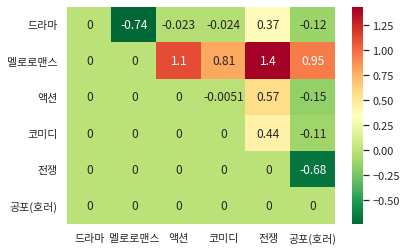

In [42]:
import numpy as np; 
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font="Noto Sans CJK JP")

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

# 6-8. 프로젝트 : 모든 장르 간 편향성 측정해 보기
지금까지 우리는 영화 시놉시스 코퍼스를 가지고 영화 구분과 영화 장르 간에 내재된 편향성을 측정하는 작업을 진행해 보았습니다. 어느 정도는 우리의 상식과 일치하는 편향성이 측정되었을 것입니다.

이번에는 모든 장르에 대해 영화 구분과의 편향성 정도를 측정해 보겠습니다. 대부분의 과정은 이전 스텝에서 이미 진행한 내용을 참고해서 동일하게 진행 가능할 것입니다.



## STEP 1. 형태소 분석기를 이용하여 품사가 명사인 경우 해당 단어를 추출하기


In [43]:
import os
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    for i in range(20):
        print(file.readline(), end=' ')

사운드 엔지니어 상우(유지태 분)는 치매에 걸린 할머니(백성희 분)와
  젊은 시절 상처한 한 아버지(박인환 분), 고모(신신애 분)와 함께 살고 있다.
  어느 겨울 그는 지방 방송국 라디오 PD 은수(이영애 분)를 만난다.
  자연의 소리를 채집해 틀어주는 라디오 프로그램을 준비하는 은수는 상우와 녹음 여행을 떠난다.
  자연스레 가까워지는 두 사람은 어느 날, 은수의 아파트에서 밤을 보낸다.
  너무 쉽게 사랑에 빠진 두 사람... 상우는 주체할 수 없을 정도로 그녀에게 빨려든다.
  그러나 겨울에 만난 두 사람의 관계는 봄을 지나 여름을 맞이하면서 삐걱거린다.
  이혼 경험이 있는 은수는 상우에게 결혼할 생각이 없다며 부담스러운 표정을 내비친다.
  "어떻게 사랑이 변하니?..."라고 묻는 상우에게 은수는 그저 "헤어져" 라고 단호하게 말한다.
  영원히 변할 것 같지 않던 사랑이 변하고, 그 사실을 받아들이지 못하는 상우는 어찌 할 바를 모른다.
  은수를 잊지 못하는 상우는 미련과 집착의 감정을 이기지 못하고 서울과 강릉을 오간다.
 유사 이래 연령, 성별, 빈부의 차이와 정치적인 입장을 불문하고 일거에 국민을 통합해 온 '애국심'이라는 성역에 일침을 가하는 다큐멘터리. 재작년 전국 민족민주 유가족협의회의 장기농성을 다룬 인상적인 다큐멘터리 <민들레>를 만들었던 독립영화집단 '빨간 눈사람'이 우리 사회 구석구석을 발빠르게 돌아다니며 애국심과 민족주의가 강요되는 현장을 발굴하여 카메라에 담았다. 박홍 서강대 명예총장, 이도형 '한국논단' 발행인, 축구해설자 신문선, 홍세화, 박노해 등 사회 각계의 '스타'들이 등장해 저마다의 확고한 신념을 성토한다. 감독 이경순과 최하동하는 이 작품을 위해 3년간 백여 명을 인터뷰했다고 한다. 2001 올해의 독립영화상 수상.
  민족과 국가란 공동체에서 부단히 권력과 부를 얻는 자, 나아가 민족과 국가란 공동체에서 얻은 신분과 부귀를 영원히 그의 자손에게 대물림하려는 자, 그래서 민족과 국가란 공동체를 부단히 유지해

In [44]:
# 약 15분정도 걸립니다.
from konlpy.tag import Okt
okt = Okt()
tokenized = []
with open(os.getenv('HOME')+'/aiffel/weat/synopsis.txt', 'r') as file:
    while True:
        line = file.readline()
        if not line: break
        words = okt.pos(line, stem=True, norm=True)
        # - norm은 normalize의 약자로 문장을 정규화하는 역할 - stem은 각 단어에서 어간을 추출하는 기능
        res = []
        for w in words:
            if w[1] in ["Noun"]:      # "Adjective", "Verb" 등을 포함할 수도 있습니다.
                res.append(w[0])    # 명사일 때만 tokenized 에 저장하게 됩니다. 
        tokenized.append(res)

In [45]:
print(len(tokenized))

71156


## STEP 2. 추출된 결과로 embedding model 만들기

In [46]:
from gensim.models import Word2Vec

# tokenized에 담긴 데이터를 가지고 나만의 Word2Vec을 생성합니다. (Gensim 4.0 기준)
# model = Word2Vec(tokenized, vector_size=100, window=5, min_count=3, sg=0)  
# model.wv.most_similar(positive=['영화'])

# Gensim 3.X 에서는 아래와 같이 생성합니다. 
model = Word2Vec(tokenized, size=100, window=5, min_count=3, sg=0)  
model.most_similar(positive=['영화'])

/home/aiffel-dj47/anaconda3/envs/aiffel/lib/python3.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  if __name__ == '__main__':


[('작품', 0.9098376035690308),
 ('다큐멘터리', 0.8678223490715027),
 ('드라마', 0.8528831005096436),
 ('영화로', 0.8340613842010498),
 ('버자이너', 0.8180097341537476),
 ('코미디', 0.8102328777313232),
 ('형식', 0.8081697225570679),
 ('스토리', 0.8052363991737366),
 ('주제', 0.804085373878479),
 ('인터뷰', 0.796782374382019)]

In [47]:
model.wv.most_similar(positive=['사랑'])

[('아르튬', 0.7463949918746948),
 ('세츠코', 0.7444090247154236),
 ('첫사랑', 0.7220227122306824),
 ('토마슈', 0.7202155590057373),
 ('애정', 0.7178007960319519),
 ('연애', 0.7132420539855957),
 ('행복', 0.7108005285263062),
 ('진심', 0.699836254119873),
 ('이별', 0.6974068880081177),
 ('만남', 0.6869170665740967)]

In [48]:
model.wv.most_similar(positive=['연극'])

[('영화감독', 0.9001518487930298),
 ('시나리오', 0.8961962461471558),
 ('배우', 0.8875908851623535),
 ('캐스팅', 0.8808577060699463),
 ('공연', 0.8763746619224548),
 ('뮤지션', 0.8762131333351135),
 ('데뷔', 0.8717076778411865),
 ('오페라', 0.8675350546836853),
 ('주연', 0.866510272026062),
 ('각색', 0.866002082824707)]

## STEP 3. target, attribute 단어 셋 만들기

이전 스텝에서는 TF-IDF를 사용해서 단어 셋을 만들었습니다. 이 방법으로도 어느 정도는 대표 단어를 잘 선정할 수 있습니다. 그러나 TF-IDF가 높은 단어를 골랐음에도 불구하고 중복되는 단어가 발생하는 문제가 있었습니다.
개념축을 표현하는 단어가 제대로 선정되지 않은 것은 WEAT 계산 결과에 악영향을 미칩니다.

혹시 TF-IDF를 적용했을 때의 문제점이 무엇인지 지적 가능하다면 그 문제점을 지적하고 스스로 방법을 개선하여 대표 단어 셋을 구축해 보기 바랍니다. TF-IDF 방식을 쓰더라도 중복된 단어를 잘 제거하면 여전히 유용한 방식이 될 수 있습니다.

```
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']
         ```

In [49]:
import os
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from konlpy.tag import Okt

art_txt = 'synopsis_art.txt'
gen_txt = 'synopsis_gen.txt'

def read_token(file_name):
    okt = Okt()
    result = []
    with open(os.getenv('HOME')+'/aiffel/weat/'+file_name, 'r') as fread: 
        print(file_name, '파일을 읽고 있습니다.')
        while True:
            line = fread.readline() 
            if not line: break 
            tokenlist = okt.pos(line, stem=True, norm=True) 
            for word in tokenlist:
                if word[1] in ["Noun"]:#, "Adjective", "Verb"]:
                    result.append((word[0])) 
    return ' '.join(result)

In [50]:
# 2개의 파일을 처리하는데 10분 가량 걸립니다. 
art = read_token(art_txt)
gen = read_token(gen_txt)

synopsis_art.txt 파일을 읽고 있습니다.
synopsis_gen.txt 파일을 읽고 있습니다.


WEAT 계산을 위해서는 총 4개의 단어 셋 X, Y, A, B가 필요합니다. 예를 들어, 예술영화라는 개념을 가장 잘 대표하는 단어들을 art_txt를 처리해서 만든 art라는 단어 리스트에서부터 골라내야 하는 것입니다. 이를 위해서 우리가 각자의 상식을 동원해서 적절한 단어를 골라낼 수도 있을 것입니다. 하지만 보다 납득할 수 있는 보편적인 방법을 사용하기를 바랍니다.

어떤 개념을 나타내는 단어를 선정하는 방법으로 어떤 것이 적당할까요? 꼭 정해진 방법이 있는 것은 아닙니다. 그러나 이번 경우에는 예술영화, 일반영화라는 영화구분별로 시놉시스를 모아 데이터를 구성했습니다. 그렇다면 예술영화를 잘 대표하는 단어란, 예술영화 시놉시스에는 자주 나타나지만 그 외 다른 구분의 영화(예를 들어 일반영화) 시놉시스에는 자주 나타나지 않는 것을 고르는 것이 적당할 것입니다.

이런 것과 비슷한 개념의 단어 분석 방식 중 TF-IDF라는 것을 이미 접해 보셨을 것입니다. 즉, 코퍼스에서 자주 나타나는(TF가 높은) 단어이지만, 다른 코퍼스에까지 두루 걸쳐 나오지는 않는(IDF가 높은) 단어를 선정하고 싶은 것입니다.
이번에는 단어 셋 구성을 위해 TF-IDF방식을 사용하겠습니다. (그러나 이 방식이 최선이라는 것은 아닙니다.)

In [51]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform([art, gen])

print(X.shape)

(2, 41082)


In [52]:
print(vectorizer.vocabulary_['영화'])
print(vectorizer.get_feature_names()[23976])

23976
영화


In [53]:
m1 = X[0].tocoo()   # art를 TF-IDF로 표현한 spart matrix를 가져옵니다. 
m2 = X[1].tocoo()   # gen을 TF-IDF로 표현한 spart matrix를 가져옵니다. 

w1 = [[i, j] for i, j in zip(m1.col, m1.data)]
w2 = [[i, j] for i, j in zip(m2.col, m2.data)]

w1.sort(key=lambda x: x[1], reverse=True)   #art를 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 
w2.sort(key=lambda x: x[1], reverse=True)   #gen을 구성하는 단어들을 TF-IDF가 높은 순으로 정렬합니다. 

print('예술영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w1[i][0]], end=', ')

print('\n')
    
print('일반영화를 대표하는 단어들:')
for i in range(100):
    print(vectorizer.get_feature_names()[w2[i][0]], end=', ')

예술영화를 대표하는 단어들:
그녀, 자신, 시작, 위해, 사랑, 사람, 영화, 친구, 남자, 가족, 이야기, 마을, 사건, 마음, 세상, 아버지, 아이, 엄마, 모든, 여자, 대한, 서로, 과연, 다시, 시간, 아들, 소녀, 아내, 다른, 사이, 영화제, 세계, 사실, 하나, 점점, 남편, 감독, 여행, 인생, 발견, 모두, 순간, 우리, 가장, 마지막, 생활, 아빠, 모습, 통해, 죽음, 기억, 비밀, 학교, 음악, 한편, 소년, 생각, 도시, 명의, 사고, 결혼, 전쟁, 때문, 위기, 이제, 최고, 이자, 과거, 일상, 경찰, 상황, 간다, 미국, 결심, 운명, 현실, 관계, 지금, 단편, 여인, 하루, 이름, 이후, 준비, 인간, 감정, 만난, 국제, 처음, 충격, 살인, 누구, 동안, 존재, 그린, 어머니, 연인, 계속, 동생, 작품, 

일반영화를 대표하는 단어들:
자신, 그녀, 영화제, 위해, 사람, 시작, 국제, 영화, 친구, 사랑, 남자, 이야기, 대한, 서울, 여자, 사건, 남편, 아이, 가족, 아버지, 다른, 마을, 시간, 엄마, 아들, 모든, 단편, 마음, 사실, 다시, 세계, 모습, 작품, 통해, 생각, 서로, 세상, 발견, 감독, 아내, 관계, 소녀, 사이, 하나, 우리, 애니메이션, 때문, 여성, 죽음, 과연, 점점, 인간, 생활, 한편, 결혼, 상황, 모두, 기억, 명의, 소년, 여행, 가장, 간다, 순간, 이제, 도시, 비밀, 학교, 과거, 가지, 이자, 경찰, 마지막, 미국, 동안, 전쟁, 주인공, 대해, 존재, 현실, 연출, 사고, 살인, 일상, 어머니, 계속, 사회, 인생, 다큐멘터리, 부문, 섹스, 최고, 바로, 동생, 의도, 하루, 위기, 계획, 정체, 한국, 

어떤가요? 두 개념을 대표하는 단어를 TF-IDF가 높은 순으로 추출하고 싶었는데, 양쪽에 중복된 단어가 너무 많은 것을 볼 수 있습니다.
두 개념축이 대조되도록 대표하는 단어 셋을 만들고 싶기 때문에 중복되지 않게 추출하도록 합니다.
우선 상위 100개의 단어들 중 중복되는 단어를 제외하고 상위 n(=15)개의 단어를 추출합니다.

In [54]:
n = 15
w1_, w2_ = [], []
for i in range(100):
    w1_.append(vectorizer.get_feature_names()[w1[i][0]])
    w2_.append(vectorizer.get_feature_names()[w2[i][0]])

# w1에만 있고 w2에는 없는, 예술영화를 잘 대표하는 단어를 15개 추출한다.
target_art, target_gen = [], []
for i in range(100):
    if (w1_[i] not in w2_) and (w1_[i] in model.wv): target_art.append(w1_[i])
    if len(target_art) == n: break 

# w2에만 있고 w1에는 없는, 일반영화를 잘 대표하는 단어를 15개 추출한다.
for i in range(100):
    if (w2_[i] not in w1_) and (w2_[i] in model.wv): target_gen.append(w2_[i])
    if len(target_gen) == n: break

In [55]:
# 추출된 단어 살펴 보기 
print(target_art)
print(target_gen)

['아빠', '음악', '결심', '운명', '지금', '여인', '이름', '이후', '준비', '감정', '만난', '처음', '충격', '누구', '그린']
['서울', '애니메이션', '여성', '가지', '주인공', '대해', '연출', '사회', '다큐멘터리', '부문', '섹스', '바로', '의도', '계획', '정체']


이번에는 장르별 대표 단어를 추출해 봅시다. 이번에는 드라마 장르와 액션 장르를 다루어 보려고 합니다. 그러나 그렇다고 해서 드라마와 액션 단 2개의 장르만 고려하기보다는 여러 장르의 코퍼스를 두루 고려하는 것이 특정 장르를 대표하는 단어를 선택하는 데 더 유리할 것입니다. 이번에는 주요 장르 5개만 고려해 봅시다

In [56]:
genre_txt = ['synopsis_SF.txt', 'synopsis_family.txt', 'synopsis_show.txt', 'synopsis_horror.txt', 'synopsis_etc.txt', 
             'synopsis_documentary.txt', 'synopsis_drama.txt', 'synopsis_romance.txt', 'synopsis_musical.txt', 
             'synopsis_mystery.txt', 'synopsis_crime.txt', 'synopsis_historical.txt', 'synopsis_western.txt', 
             'synopsis_adult.txt', 'synopsis_thriller.txt', 'synopsis_animation.txt', 'synopsis_action.txt', 
             'synopsis_adventure.txt', 'synopsis_war.txt', 'synopsis_comedy.txt', 'synopsis_fantasy.txt']
genre_name = ['SF', '가족', '공연', '공포(호러)', '기타', '다큐멘터리', '드라마', '멜로로맨스', '뮤지컬', '미스터리', '범죄', '사극', '서부극(웨스턴)',
         '성인물(에로)', '스릴러', '애니메이션', '액션', '어드벤처', '전쟁', '코미디', '판타지']

In [57]:
# 약 10분정도 걸립니다.
genre = []
for file_name in genre_txt:
    genre.append(read_token(file_name))

synopsis_SF.txt 파일을 읽고 있습니다.
synopsis_family.txt 파일을 읽고 있습니다.
synopsis_show.txt 파일을 읽고 있습니다.
synopsis_horror.txt 파일을 읽고 있습니다.
synopsis_etc.txt 파일을 읽고 있습니다.
synopsis_documentary.txt 파일을 읽고 있습니다.
synopsis_drama.txt 파일을 읽고 있습니다.
synopsis_romance.txt 파일을 읽고 있습니다.
synopsis_musical.txt 파일을 읽고 있습니다.
synopsis_mystery.txt 파일을 읽고 있습니다.
synopsis_crime.txt 파일을 읽고 있습니다.
synopsis_historical.txt 파일을 읽고 있습니다.
synopsis_western.txt 파일을 읽고 있습니다.
synopsis_adult.txt 파일을 읽고 있습니다.
synopsis_thriller.txt 파일을 읽고 있습니다.
synopsis_animation.txt 파일을 읽고 있습니다.
synopsis_action.txt 파일을 읽고 있습니다.
synopsis_adventure.txt 파일을 읽고 있습니다.
synopsis_war.txt 파일을 읽고 있습니다.
synopsis_comedy.txt 파일을 읽고 있습니다.
synopsis_fantasy.txt 파일을 읽고 있습니다.


In [58]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(genre)

print(X.shape)

(21, 42191)


In [59]:
m = [X[i].tocoo() for i in range(X.shape[0])]

w = [[[i, j] for i, j in zip(mm.col, mm.data)] for mm in m]

for i in range(len(w)):
    w[i].sort(key=lambda x: x[1], reverse=True)
attributes = []
for i in range(len(w)):
    print(genre_name[i], end=': ')
    attr = []
    j = 0
    while (len(attr) < 15):
        if vectorizer.get_feature_names()[w[i][j][0]] in model.wv:
            attr.append(vectorizer.get_feature_names()[w[i][j][0]])
            print(vectorizer.get_feature_names()[w[i][j][0]], end=', ')
        j += 1
    attributes.append(attr)
    print()

SF: 위해, 자신, 지구, 시작, 사람, 인류, 인간, 미래, 우주, 그녀, 로봇, 세계, 모든, 박사, 우주선, 
가족: 엄마, 아빠, 가족, 영화제, 자신, 위해, 친구, 아주르, 아버지, 시작, 그녀, 아들, 마을, 국제, 낙타, 
공연: 오페라, 사랑, 토스카, 실황, 올레, 자신, 카바, 그녀, 공연, 오텔로, 리골레토, 백작, 프레, 베르디, 위해, 
공포(호러): 시작, 위해, 사람, 자신, 친구, 그녀, 사건, 공포, 발견, 죽음, 마을, 가족, 악령, 남자, 좀비, 
기타: 영화제, 국제, 서울, 단편, 영화, 자신, 사람, 이야기, 그녀, 남자, 위해, 시작, 사랑, 뉴미디어, 페스티벌, 
다큐멘터리: 영화제, 영화, 다큐, 국제, 다큐멘터리, 사람, 이야기, 대한, 자신, 감독, 위해, 서울, 우리, 시작, 세계, 
드라마: 자신, 영화제, 그녀, 사람, 사랑, 영화, 위해, 시작, 국제, 남자, 친구, 이야기, 엄마, 여자, 아버지, 
멜로로맨스: 그녀, 사랑, 자신, 시작, 남편, 남자, 여자, 사람, 친구, 섹스, 위해, 마음, 결혼, 서로, 아내, 
뮤지컬: 뮤지컬, 사랑, 에스메랄다, 그녀, 음악, 충무로, 모차르트, 영화, 토스카, 자신, 니웨, 카바, 영화제, 바흐, 페뷔스, 
미스터리: 사건, 그녀, 시작, 자신, 위해, 사람, 발견, 사고, 진실, 죽음, 기억, 살인, 친구, 아내, 남자, 
범죄: 사건, 위해, 자신, 경찰, 시작, 그녀, 범죄, 조직, 살인, 사람, 마약, 형사, 남자, 모든, 살해, 
사극: 조선, 위해, 시작, 신기전, 사랑, 자신, 아가멤논, 황제, 그녀, 루안, 최고, 운명, 사람, 하선, 전쟁, 
서부극(웨스턴): 서부, 보안관, 위해, 벌린, 카우보이, 그레이프바인, 헨리, 마을, 자신, 개릿, 아이, 시작, 무법자, 프린트, 마적, 
성인물(에로): 그녀, 남편, 마사지, 자신, 섹스, 관계, 영화, 정사, 남자, 위해, 시작, 여자, 유부녀, 마음, 사랑, 
스릴러: 자신, 그녀, 사건, 

## STEP 4. WEAT score 계산과 시각화

영화 구분, 영화 장르에 따른 편향성을 측정하여 WEAT score로 계산해 보고 이를 Heatmap 형태로 시각화해 봅시다. 편향성이 두드러지는 영화장르 attribute 구성에는 어떤 케이스가 있는지 시각적으로 두드러지게 구성되면 좋습니다.

In [60]:
matrix = [[0 for _ in range(len(genre_name))] for _ in range(len(genre_name))]

In [61]:
A = np.array([model.wv[word] for word in target_art])
B = np.array([model.wv[word] for word in target_gen])

for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        X = np.array([model.wv[word] for word in attributes[i]])
        Y = np.array([model.wv[word] for word in attributes[j]])
        matrix[i][j] = weat_score(X, Y, A, B)

matrix를 채워보았습니다.
WEAT score 값이 2와 -2에 가까운 수치들을 보고, 과연 우리의 직관과 비슷한지 살펴볼까요?

In [62]:
for i in range(len(genre_name)-1):
    for j in range(i+1, len(genre_name)):
        if matrix[i][j] > 1.1 or matrix[i][j] < -1.1:
            print(genre_name[i], genre_name[j],matrix[i][j])

SF 멜로로맨스 -1.3356807
공포(호러) 다큐멘터리 1.1359556
기타 멜로로맨스 -1.1921527
다큐멘터리 멜로로맨스 -1.4940125
다큐멘터리 미스터리 -1.2628145
다큐멘터리 성인물(에로) -1.253703
다큐멘터리 스릴러 -1.1539885
멜로로맨스 뮤지컬 1.1292549
멜로로맨스 범죄 1.2481953
멜로로맨스 서부극(웨스턴) 1.1192809
멜로로맨스 애니메이션 1.1851001
멜로로맨스 액션 1.10197
멜로로맨스 전쟁 1.421803


예술영화와 일반영화, 그리고 다큐멘터리와 멜로로맨스의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 다큐멘터리는 일반 영화와 가깝다고 볼 수 있습니다.

예술영화와 일반영화, 그리고 멜로로맨스와 전쟁의 WEAT score의 의미를 해석해보면 예술 영화는 멜로로맨스와 가깝고, 전쟁은 일반 영화와 가깝다고 볼 수 있습니다.


<AxesSubplot:>

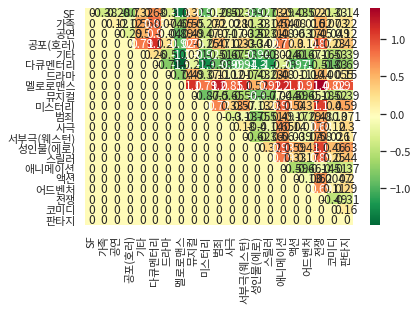

In [63]:
import numpy as np; 
import seaborn as sns; 

np.random.seed(0)

# 한글 지원 폰트
sns.set(font="Noto Sans CJK JP")

ax = sns.heatmap(matrix, xticklabels=genre_name, yticklabels=genre_name, annot=True,  cmap='RdYlGn_r')
ax

# 총평

1. 주어진 영화 코퍼스를 바탕으로 워드임베딩 모델을 정상적으로 만들었다.
- 워드임베딩의 most_similar() 메소드 결과가 의미상 바르게 나왔다.
    - 결과: '사랑'에 대해서 첫사랑, 진심, 연애 등 바른 의미들이 나왔다.

2. 영화 구분, 장르별로 target, attribute에 대한 대표성있는 단어 셋을 생성하였다.
- 타당한 방법론을 통해 중복이 잘 제거되고 개념축을 의미적으로 잘 대표하는 단어 셋이 만들어졌다.
    - 결과: '전쟁'에 대해서 전쟁, 위해, 전투, 시작, 작전, 독일군, 부대, 독일, 윈터스, 자신, 사람, 공격, 임무, 연합군, 병사 등 대표하는 단어들이 잘 나온 것 같다.
    
3. WEAT score 계산 및 시각화를 정상적으로 진행하였다.
- 전체 영화 장르별로 예술/일반 영화에 대한 편향성 WEAT score가 상식에 부합하는 수치로 얻어졌으며 이를 잘 시각화하였다.
    - 결과: 노드를 따라해서 잘 나온 것 같다. 사이즈를 조금 더 크게해서 정확한 숫자까지 봤으면 더 좋았겠지만 그래도 색으로 구분되어서 확인할 수 있다.